In [12]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
import warnings
warnings.filterwarnings("ignore")

In [13]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


## Loading of dataset

In [14]:
df_test = pd.read_csv('D:\AIT\Sem 1\Machine Learning\Medical_prediction\Medical_prediction\source_code\data\Testing.csv')
df = pd.read_csv('D:\AIT\Sem 1\Machine Learning\Medical_prediction\Medical_prediction\source_code\data\Training.csv')

In [15]:
df.shape

(4920, 134)

In [16]:
df_test.shape

(42, 133)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [18]:
df.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0       0           0             0        0                 0   
1       0           0             0        0                 0   
2       0           0             0        0                 0   
3       0           0             0        0                 0   
4       0           0             0        0                 0   

   muscle_wasting  vomiting  burning_micturition  spotting_ urination  \
0               0         0                    0                    0   
1               0         0                    0                    0   
2               0         0                    0                    0   
3               0         0                    0                    0   
4               0         0                    0                    0   

   fatigue  weight_gain  anxiety  cold_hands_and_feets  mood_swings  \
0        0            0        0                     0            0   
1        0            0        0                     0            0   
2        0            0        0                     0            0   
3        0            0        0                     0            0   
4        0            0        0                     0            0   

   weight_loss  restlessness  lethargy  patches_in_throat  \
0            0             0         0                  0   
1            0             0         0                  0   
2            0             0         0                  0   
3            0             0         0                  0   
4            0             0         0                  0   

   irregular_sugar_level  cough  high_fever  sunken_eyes  breathlessness  \
0                      0      0           0            0               0   
1                      0      0           0            0               0   
2                      0      0           0            0               0   
3                      0      0           0            0               0   
4                      0      0           0            0               0   

   sweating  dehydration  indigestion  headache  yellowish_skin  dark_urine  \
0         0            0            0         0               0           0   
1         0            0            0         0               0           0   
2         0            0            0         0               0           0   
3         0            0            0         0               0           0   
4         0            0            0         0               0           0   

   nausea  loss_of_appetite  pain_behind_the_eyes  back_pain  constipation  \
0       0                 0                     0          0             0   
1       0                 0                     0          0             0   
2       0                 0                     0          0             0   
3       0                 0                     0          0             0   
4       0                 0                     0          0             0   

   abdominal_pain  diarrhoea  mild_fever  yellow_urine  yellowing_of_eyes  \
0               0          0           0             0                  0   
1               0          0           0             0                  0   
2               0          0           0             0                  0   
3               0          0           0             0                  0   
4               0          0           0             0                  0   

   acute_liver_failure  fluid_over

In [19]:
df.describe()

itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  4920.000000  4920.000000           4920.000000          4920.000000   
mean      0.137805     0.159756              0.021951             0.045122   
std       0.344730     0.366417              0.146539             0.207593   
min       0.000000     0.000000              0.000000             0.000000   
25%       0.000000     0.000000              0.000000             0.000000   
50%       0.000000     0.000000              0.000000             0.000000   
75%       0.000000     0.000000              0.000000             0.000000   
max       1.000000     1.000000              1.000000             1.000000   

         shivering       chills   joint_pain  stomach_pain      acidity  \
count  4920.000000  4920.000000  4920.000000   4920.000000  4920.000000   
mean      0.021951     0.162195     0.139024      0.045122     0.045122   
std       0.146539     0.368667     0.346007      0.207593     0.207593   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%       0.000000     0.000000     0.000000      0.000000     0.000000   
50%       0.000000     0.000000     0.000000      0.000000     0.000000   
75%       0.000000     0.000000     0.000000      0.000000     0.000000   
max       1.000000     1.000000     1.000000      1.000000     1.000000   

       ulcers_on_tongue  muscle_wasting     vomiting  burning_micturition  \
count       4920.000000     4920.000000  4920.000000          4920.000000   
mean           0.021951        0.021951     0.389024             0.043902   
std            0.146539        0.146539     0.487578             0.204899   
min            0.000000        0.000000     0.000000             0.000000   
25%            0.000000        0.000000     0.000000             0.000000   
50%            0.000000        0.000000     0.000000             0.000000   
75%            0.000000        0.000000     1.000000             0.000000   
max            1.000000        1.000000     1.000000             1.000000   

       spotting_ urination      fatigue  weight_gain      anxiety  \
count          4920.000000  4920.000000  4920.000000  4920.000000   
mean              0.021951     0.392683     0.023171     0.023171   
std               0.146539     0.488397     0.150461     0.150461   
min               0.000000     0.000000     0.000000     0.000000   
25%               0.000000     0.000000     0.000000     0.000000   
50%               0.000000     0.000000     0.000000     0.000000   
75%               0.000000     1.000000     0.000000     0.000000   
max               1.000000     1.000000     1.000000     1.000000   

       cold_hands_and_feets  mood_swings  weight_loss  restlessness  \
count           4920.000000  4920.000000  4920.000000   4920.000000   
mean               0.023171     0.046341     0.092683      0.046341   
std                0.150461     0.210245     0.290017      0.210245   
min                0.000000     0.000000     0.000000      0.000000   
25%                0.000000     0.000000     0.000000      0.000000   
50%                0.000000     0.000000     0.000000      0.000000   
75%                0.000000     0.000000     0.000000      0.000000   
max                1.000000     1.000000     1.000000      1.000000   

          lethargy  patches_in_throat  irregular_sugar_level        cough  \
count  4920.000000        4920.000000            4920.000000  4920.000000   
mean      0.092683           0.021951               0.023171     0.114634   
std       0.290017           0.146539               0.150461     0.318612   
min       0.000000           0.000000               0.000000     0.000000   
25%       0.000000           0.000000               0.000000     0.000000   
50%       0.000000           0.000000               0.000000     0.000000   
75%       0.000000           0.000000               0.000000     0.000000   
max       1.000000           1.000000               1.000000

In [20]:
df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis',
       'Unnamed: 133'],
      dtype='object', length=134)

## Data Preprocessing and Feature Engineering

In [21]:
columns_with_zeros = df.columns[(df == 0).all()]
columns_with_zeros

Index(['fluid_overload'], dtype='object')

In [22]:
df.drop(columns=['fluid_overload.1','fluid_overload'],inplace=True)

In [23]:
df.prognosis.unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [24]:
label_mapping = {
    'Acne': 'Skin Disorders',
    'Psoriasis': 'Skin Disorders',
    'Impetigo': 'Skin Disorders'
}

df['prognosis'] = df['prognosis'].replace(label_mapping)

In [25]:
skin_disorders_symptoms = df[df['prognosis'] == 'Skin Disorders'].iloc[:, :-2]

skin_disorders_symptoms = skin_disorders_symptoms.columns[skin_disorders_symptoms.eq(1).any()]

skin_disorders_symptoms_list = skin_disorders_symptoms.tolist()

In [26]:
skin_disorders_symptoms_list

['skin_rash',
 'joint_pain',
 'high_fever',
 'pus_filled_pimples',
 'blackheads',
 'scurring',
 'skin_peeling',
 'silver_like_dusting',
 'small_dents_in_nails',
 'inflammatory_nails',
 'blister',
 'red_sore_around_nose',
 'yellow_crust_ooze']

In [27]:
symptom_column = 'yellow_crust_ooze'

diseases_with_symptom = df[df[symptom_column] == 1]['prognosis']

In [28]:
diseases_with_symptom.unique()

array(['Skin Disorders'], dtype=object)

In [29]:
columns_to_drop = ['pus_filled_pimples', 'blackheads', 'scurring', 'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails', 'blister', 'red_sore_around_nose', 'skin_peeling','yellow_crust_ooze']
df.drop(columns=columns_to_drop, inplace=True)

In [30]:
df = df[df['prognosis'] != 'Skin Disorders']

In [31]:
df.shape

(4560, 122)

In [32]:
df.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0       0           0             0        0                 0   
1       0           0             0        0                 0   
2       0           0             0        0                 0   
3       0           0             0        0                 0   
4       0           0             0        0                 0   

   muscle_wasting  vomiting  burning_micturition  spotting_ urination  \
0               0         0                    0                    0   
1               0         0                    0                    0   
2               0         0                    0                    0   
3               0         0                    0                    0   
4               0         0                    0                    0   

   fatigue  weight_gain  anxiety  cold_hands_and_feets  mood_swings  \
0        0            0        0                     0            0   
1        0            0        0                     0            0   
2        0            0        0                     0            0   
3        0            0        0                     0            0   
4        0            0        0                     0            0   

   weight_loss  restlessness  lethargy  patches_in_throat  \
0            0             0         0                  0   
1            0             0         0                  0   
2            0             0         0                  0   
3            0             0         0                  0   
4            0             0         0                  0   

   irregular_sugar_level  cough  high_fever  sunken_eyes  breathlessness  \
0                      0      0           0            0               0   
1                      0      0           0            0               0   
2                      0      0           0            0               0   
3                      0      0           0            0               0   
4                      0      0           0            0               0   

   sweating  dehydration  indigestion  headache  yellowish_skin  dark_urine  \
0         0            0            0         0               0           0   
1         0            0            0         0               0           0   
2         0            0            0         0               0           0   
3         0            0            0         0               0           0   
4         0            0            0         0               0           0   

   nausea  loss_of_appetite  pain_behind_the_eyes  back_pain  constipation  \
0       0                 0                     0          0             0   
1       0                 0                     0          0             0   
2       0                 0                     0          0             0   
3       0                 0                     0          0             0   
4       0                 0                     0          0             0   

   abdominal_pain  diarrhoea  mild_fever  yellow_urine  yellowing_of_eyes  \
0               0          0           0             0                  0   
1               0          0           0             0                  0   
2               0          0           0             0                  0   
3               0          0           0             0                  0   
4               0          0           0             0                  0   

   acute_liver_failure  swelling_o

In [33]:
diseases_with_chills = df[df['chills'] == 1]['prognosis']
diseases_with_chills.unique()

array(['Allergy', 'Malaria', 'Dengue', 'Typhoid', 'Tuberculosis',
       'Common Cold', 'Pneumonia'], dtype=object)

In [34]:
diseases_with_shivering = df[df['shivering'] == 1]['prognosis']
diseases_with_shivering.unique()

array(['Allergy'], dtype=object)

In [35]:
df['shivering_or_chills'] = df['shivering'] | df['chills']
df.drop(columns=['shivering','chills'], inplace=True)

In [36]:
diseases_with_shivering_or_chills = df[df['shivering_or_chills'] == 1]['prognosis']
diseases_with_shivering_or_chills.unique()

array(['Allergy', 'Malaria', 'Dengue', 'Typhoid', 'Tuberculosis',
       'Common Cold', 'Pneumonia'], dtype=object)

In [37]:
diseases_with_nodal_skin_eruptions = df[df['nodal_skin_eruptions'] == 1]['prognosis']
diseases_with_nodal_skin_eruptions.unique()

array(['Fungal infection'], dtype=object)

In [38]:
diseases_with_nodal_skin_rash = df[df['skin_rash'] == 1]['prognosis']
diseases_with_nodal_skin_rash.unique()

array(['Fungal infection', 'Drug Reaction', 'Chicken pox', 'Dengue'],
      dtype=object)

In [39]:
df['skin_rash'] = df['nodal_skin_eruptions'] | df['skin_rash']
df.drop(columns=['nodal_skin_eruptions'], inplace=True)

In [40]:
diseases_with_skin_rash = df[df['skin_rash'] == 1]['prognosis']
diseases_with_skin_rash.unique()

array(['Fungal infection', 'Drug Reaction', 'Chicken pox', 'Dengue'],
      dtype=object)

In [41]:
df.head()

itching  skin_rash  continuous_sneezing  joint_pain  stomach_pain  acidity  \
0        1          1                    0           0             0        0   
1        0          1                    0           0             0        0   
2        1          1                    0           0             0        0   
3        1          1                    0           0             0        0   
4        1          1                    0           0             0        0   

   ulcers_on_tongue  muscle_wasting  vomiting  burning_micturition  \
0                 0               0         0                    0   
1                 0               0         0                    0   
2                 0               0         0                    0   
3                 0               0         0                    0   
4                 0               0         0                    0   

   spotting_ urination  fatigue  weight_gain  anxiety  cold_hands_and_feets  \
0                    0        0            0        0                     0   
1                    0        0            0        0                     0   
2                    0        0            0        0                     0   
3                    0        0            0        0                     0   
4                    0        0            0        0                     0   

   mood_swings  weight_loss  restlessness  lethargy  patches_in_throat  \
0            0            0             0         0                  0   
1            0            0             0         0                  0   
2            0            0             0         0                  0   
3            0            0             0         0                  0   
4            0            0             0         0                  0   

   irregular_sugar_level  cough  high_fever  sunken_eyes  breathlessness  \
0                      0      0           0            0               0   
1                      0      0           0            0               0   
2                      0      0           0            0               0   
3                      0      0           0            0               0   
4                      0      0           0            0               0   

   sweating  dehydration  indigestion  headache  yellowish_skin  dark_urine  \
0         0            0            0         0               0           0   
1         0            0            0         0               0           0   
2         0            0            0         0               0           0   
3         0            0            0         0               0           0   
4         0            0            0         0               0           0   

   nausea  loss_of_appetite  pain_behind_the_eyes  back_pain  constipation  \
0       0                 0                     0          0             0   
1       0                 0                     0          0             0   
2       0                 0                     0          0             0   
3       0                 0                     0          0             0   
4       0                 0                     0          0             0   

   abdominal_pain  diarrhoea  mild_fever  yellow_urine  yellowing_of_eyes  \
0               0          0           0             0                  0   
1               0          0           0             0                  0   
2               0          0           0             0                  0   
3               0          0           0             0                  0   
4               0          0           0             0                  0   

   acute_liver_failure  swelling_of_stomach  swelled_lymph_nodes  malaise  \
0                    0                    0                    0        0   
1                    0                    0                    0        0   
2                    0                    0                    0        0   
3  

In [42]:
diseases_with_skin_rash = df[df['malaise'] == 1]['prognosis']
diseases_with_skin_rash.unique()

array(['Chicken pox', 'Dengue', 'Hepatitis B', 'Tuberculosis',
       'Common Cold', 'Pneumonia'], dtype=object)

In [43]:
hepatitis_B_symptoms = df[df['prognosis'] == 'Hepatitis B'].iloc[:, :-2]

hepatitis_B_symptoms = hepatitis_B_symptoms.columns[hepatitis_B_symptoms.eq(1).any()]

hepatitis_B_symptoms_list = hepatitis_B_symptoms.tolist()
hepatitis_B_symptoms_list

['itching',
 'fatigue',
 'lethargy',
 'yellowish_skin',
 'dark_urine',
 'loss_of_appetite',
 'abdominal_pain',
 'yellow_urine',
 'yellowing_of_eyes',
 'malaise',
 'receiving_blood_transfusion',
 'receiving_unsterile_injections']

In [44]:
diseases_with_receiving_unsterile_injections = df[df['receiving_unsterile_injections'] == 1]['prognosis']
diseases_with_receiving_unsterile_injections.unique()

array(['Hepatitis B'], dtype=object)

In [45]:
diseases_with_receiving_blood_transfusion = df[df['receiving_blood_transfusion'] == 1]['prognosis']
diseases_with_receiving_blood_transfusion.unique()

array(['Hepatitis B'], dtype=object)

In [46]:
df['unprotected_blood_transfusion'] = df['receiving_blood_transfusion'] | df['receiving_unsterile_injections']
df.drop(columns=['receiving_blood_transfusion','receiving_unsterile_injections'], inplace=True)

In [47]:
hepatitis_B_symptoms = df[df['prognosis'] == 'Hepatitis B'].iloc[:, :-2]

hepatitis_B_symptoms = hepatitis_B_symptoms.columns[hepatitis_B_symptoms.eq(1).any()]

hepatitis_B_symptoms_list = hepatitis_B_symptoms.tolist()
hepatitis_B_symptoms_list

['itching',
 'fatigue',
 'lethargy',
 'yellowish_skin',
 'dark_urine',
 'loss_of_appetite',
 'abdominal_pain',
 'yellow_urine',
 'yellowing_of_eyes',
 'malaise']

In [48]:
df.head()

itching  skin_rash  continuous_sneezing  joint_pain  stomach_pain  acidity  \
0        1          1                    0           0             0        0   
1        0          1                    0           0             0        0   
2        1          1                    0           0             0        0   
3        1          1                    0           0             0        0   
4        1          1                    0           0             0        0   

   ulcers_on_tongue  muscle_wasting  vomiting  burning_micturition  \
0                 0               0         0                    0   
1                 0               0         0                    0   
2                 0               0         0                    0   
3                 0               0         0                    0   
4                 0               0         0                    0   

   spotting_ urination  fatigue  weight_gain  anxiety  cold_hands_and_feets  \
0                    0        0            0        0                     0   
1                    0        0            0        0                     0   
2                    0        0            0        0                     0   
3                    0        0            0        0                     0   
4                    0        0            0        0                     0   

   mood_swings  weight_loss  restlessness  lethargy  patches_in_throat  \
0            0            0             0         0                  0   
1            0            0             0         0                  0   
2            0            0             0         0                  0   
3            0            0             0         0                  0   
4            0            0             0         0                  0   

   irregular_sugar_level  cough  high_fever  sunken_eyes  breathlessness  \
0                      0      0           0            0               0   
1                      0      0           0            0               0   
2                      0      0           0            0               0   
3                      0      0           0            0               0   
4                      0      0           0            0               0   

   sweating  dehydration  indigestion  headache  yellowish_skin  dark_urine  \
0         0            0            0         0               0           0   
1         0            0            0         0               0           0   
2         0            0            0         0               0           0   
3         0            0            0         0               0           0   
4         0            0            0         0               0           0   

   nausea  loss_of_appetite  pain_behind_the_eyes  back_pain  constipation  \
0       0                 0                     0          0             0   
1       0                 0                     0          0             0   
2       0                 0                     0          0             0   
3       0                 0                     0          0             0   
4       0                 0                     0          0             0   

   abdominal_pain  diarrhoea  mild_fever  yellow_urine  yellowing_of_eyes  \
0               0          0           0             0                  0   
1               0          0           0             0                  0   
2               0          0           0             0                  0   
3               0          0           0             0                  0   
4               0          0           0             0                  0   

   acute_liver_failure  swelling_of_stomach  swelled_lymph_nodes  malaise  \
0                    0                    0                    0        0   
1                    0                    0                    0        0   
2                    0                    0                    0        0   
3  

In [49]:
diseases_with_muscle_wasting = df[df['muscle_wasting'] == 1]['prognosis']
diseases_with_muscle_wasting.unique()

array(['AIDS'], dtype=object)

In [50]:
AIDS_symptoms = df[df['prognosis'] == 'AIDS'].iloc[:, :-2]

AIDS_symptoms = AIDS_symptoms.columns[AIDS_symptoms.eq(1).any()]

AIDS_symptoms_list = AIDS_symptoms.tolist()
AIDS_symptoms_list

['muscle_wasting', 'patches_in_throat', 'high_fever', 'extra_marital_contacts']

In [51]:
diseases_with_patches_in_throat = df[df['patches_in_throat'] == 1]['prognosis']
diseases_with_patches_in_throat.unique()

array(['AIDS'], dtype=object)

In [52]:
df['patches_in_throat'] = df['patches_in_throat'] | df['muscle_wasting']
df.drop(columns=['patches_in_throat'], inplace=True)

In [53]:
df['fatigue'] = df['fatigue'] | df['lethargy']
df.drop(columns=['lethargy'], inplace=True)

In [54]:
diseases_with_vomiting = df[df['vomiting'] == 1]['prognosis']
diseases_with_vomiting.unique()

array(['GERD', 'Chronic cholestasis', 'Peptic ulcer diseae',
       'Gastroenteritis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Dengue', 'Typhoid', 'hepatitis A', 'Hepatitis D',
       'Hepatitis E', 'Alcoholic hepatitis', 'Tuberculosis',
       'Heart attack', 'Hypoglycemia',
       '(vertigo) Paroymsal  Positional Vertigo'], dtype=object)

In [55]:
diseases_with_nausea = df[df['nausea'] == 1]['prognosis']
diseases_with_nausea.unique()

array(['Chronic cholestasis', 'Malaria', 'Dengue', 'Typhoid',
       'hepatitis A', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Hypoglycemia', '(vertigo) Paroymsal  Positional Vertigo'],
      dtype=object)

In [56]:
df['vomiting'] = df['vomiting'] | df['nausea']
df.drop(columns=['nausea'], inplace=True)

In [57]:
diseases_with_sinus_pressure = df[df['sinus_pressure'] == 1]['prognosis']
diseases_with_sinus_pressure.unique()

array(['Common Cold'], dtype=object)

In [58]:
diseases_with_runny_nose = df[df['runny_nose'] == 1]['prognosis']
diseases_with_runny_nose.unique()

array(['Common Cold'], dtype=object)

In [59]:
df['runny_nose'] = df['runny_nose'] | df['sinus_pressure']
df.drop(columns=['sinus_pressure'], inplace=True)

In [60]:
diseases_with_loss_of_balance = df[df['loss_of_balance'] == 1]['prognosis']
diseases_with_loss_of_balance.unique()

array(['Hypertension ', 'Cervical spondylosis',
       '(vertigo) Paroymsal  Positional Vertigo'], dtype=object)

In [61]:
diseases_with_unsteadiness = df[df['unsteadiness'] == 1]['prognosis']
diseases_with_unsteadiness.unique()

array(['(vertigo) Paroymsal  Positional Vertigo'], dtype=object)

In [62]:
df['unsteadiness'] = df['unsteadiness'] | df['loss_of_balance']
df.drop(columns=['loss_of_balance'], inplace=True)

In [63]:
diseases_with_unsteadiness = df[df['unsteadiness'] == 1]['prognosis']
diseases_with_unsteadiness.unique()

array(['Hypertension ', 'Cervical spondylosis',
       '(vertigo) Paroymsal  Positional Vertigo'], dtype=object)

In [64]:
Alcoholic_hepatitis_symptoms = df[df['prognosis'] == 'Alcoholic hepatitis'].iloc[:, :-2]

Alcoholic_hepatitis_symptoms = Alcoholic_hepatitis_symptoms.columns[Alcoholic_hepatitis_symptoms.eq(1).any()]

Alcoholic_hepatitis_symptoms_list = Alcoholic_hepatitis_symptoms.tolist()
Alcoholic_hepatitis_symptoms_list

['vomiting',
 'yellowish_skin',
 'abdominal_pain',
 'swelling_of_stomach',
 'distention_of_abdomen',
 'history_of_alcohol_consumption']

In [65]:
df['distention_of_abdomen'] = df['distention_of_abdomen'] | df['history_of_alcohol_consumption']
df.drop(columns=['history_of_alcohol_consumption'], inplace=True)

In [66]:
diseases_with_extra_marital_contacts = df[df['extra_marital_contacts'] == 1]['prognosis']
diseases_with_extra_marital_contacts.unique()

array(['AIDS'], dtype=object)

In [67]:
df['unprotected_blood/sex_transfusion'] = df['unprotected_blood_transfusion'] | df['extra_marital_contacts']
df.drop(columns=['extra_marital_contacts','unprotected_blood_transfusion'], inplace=True)

In [68]:
diseases_with_pain_in_anal_region = df[df['pain_in_anal_region'] == 1]['prognosis']
diseases_with_pain_in_anal_region.unique()

array(['Dimorphic hemmorhoids(piles)'], dtype=object)

In [69]:
diseases_with_irritation_in_anus = df[df['irritation_in_anus'] == 1]['prognosis']
diseases_with_irritation_in_anus.unique()

array(['Dimorphic hemmorhoids(piles)'], dtype=object)

In [70]:
df['pain/irritation_in_anal_region'] = df['pain_in_anal_region'] | df['irritation_in_anus']
df.drop(columns=['irritation_in_anus','pain_in_anal_region'], inplace=True)

In [71]:
diseases_with_dischromic_patches = df[df['dischromic _patches'] == 1]['prognosis']
diseases_with_dischromic_patches.unique()

array(['Fungal infection'], dtype=object)

In [72]:
df.rename(columns={'dischromic _patches': 'dischromic_patches'}, inplace=True)

In [73]:
diseases_with_joint_pain = df[df['joint_pain'] == 1]['prognosis']
diseases_with_joint_pain.unique()

array(['Dengue', 'hepatitis A', 'Hepatitis D', 'Hepatitis E',
       'Osteoarthristis'], dtype=object)

In [74]:
diseases_with_swelling_joints = df[df['swelling_joints'] == 1]['prognosis']
diseases_with_swelling_joints.unique()

array(['Osteoarthristis', 'Arthritis'], dtype=object)

In [75]:
df['swollen_painful_joints'] = df['swelling_joints'] | df['joint_pain']
df.drop(columns=['joint_pain','swelling_joints'], inplace=True)

In [76]:
diseases_with_spinning_movements = df[df['spinning_movements'] == 1]['prognosis']
diseases_with_spinning_movements.unique()

array(['(vertigo) Paroymsal  Positional Vertigo'], dtype=object)

In [77]:
diseases_with_unsteadiness = df[df['unsteadiness'] == 1]['prognosis']
diseases_with_unsteadiness.unique()

array(['Hypertension ', 'Cervical spondylosis',
       '(vertigo) Paroymsal  Positional Vertigo'], dtype=object)

In [78]:
df['unsteadiness'] = df['unsteadiness'] | df['spinning_movements']
df.drop(columns=['spinning_movements'], inplace=True)

In [79]:
diseases_with_dizziness = df[df['dizziness'] == 1]['prognosis']
diseases_with_dizziness.unique()

array(['Hypertension ', 'Cervical spondylosis', 'Hypothyroidism'],
      dtype=object)

In [80]:
df['unsteadiness'] = df['unsteadiness'] | df['dizziness']
df.drop(columns=['dizziness'], inplace=True)

In [81]:
diseases_with_swollen_legs = df[df['swollen_legs'] == 1]['prognosis']
diseases_with_swollen_legs.unique()

array(['Varicose veins'], dtype=object)

In [82]:
diseases_with_swollen_extremeties = df[df['swollen_extremeties'] == 1]['prognosis']
diseases_with_swollen_extremeties.unique()

array(['Hypothyroidism'], dtype=object)

In [83]:
df['swollen_extremeties'] = df['swollen_extremeties'] | df['swollen_legs']
df.drop(columns=['swollen_legs'], inplace=True)

In [84]:
df.head()

itching  skin_rash  continuous_sneezing  stomach_pain  acidity  \
0        1          1                    0             0        0   
1        0          1                    0             0        0   
2        1          1                    0             0        0   
3        1          1                    0             0        0   
4        1          1                    0             0        0   

   ulcers_on_tongue  muscle_wasting  vomiting  burning_micturition  \
0                 0               0         0                    0   
1                 0               0         0                    0   
2                 0               0         0                    0   
3                 0               0         0                    0   
4                 0               0         0                    0   

   spotting_ urination  fatigue  weight_gain  anxiety  cold_hands_and_feets  \
0                    0        0            0        0                     0   
1                    0        0            0        0                     0   
2                    0        0            0        0                     0   
3                    0        0            0        0                     0   
4                    0        0            0        0                     0   

   mood_swings  weight_loss  restlessness  irregular_sugar_level  cough  \
0            0            0             0                      0      0   
1            0            0             0                      0      0   
2            0            0             0                      0      0   
3            0            0             0                      0      0   
4            0            0             0                      0      0   

   high_fever  sunken_eyes  breathlessness  sweating  dehydration  \
0           0            0               0         0            0   
1           0            0               0         0            0   
2           0            0               0         0            0   
3           0            0               0         0            0   
4           0            0               0         0            0   

   indigestion  headache  yellowish_skin  dark_urine  loss_of_appetite  \
0            0         0               0           0                 0   
1            0         0               0           0                 0   
2            0         0               0           0                 0   
3            0         0               0           0                 0   
4            0         0               0           0                 0   

   pain_behind_the_eyes  back_pain  constipation  abdominal_pain  diarrhoea  \
0                     0          0             0               0          0   
1                     0          0             0               0          0   
2                     0          0             0               0          0   
3                     0          0             0               0          0   
4                     0          0             0               0          0   

   mild_fever  yellow_urine  yellowing_of_eyes  acute_liver_failure  \
0           0             0                  0                    0   
1           0             0                  0                    0   
2           0             0                  0                    0   
3           0             0                  0                    0   
4           0             0                  0                    0   

   swelling_of_stomach  swelled_lymph_nodes  malaise  \
0                    0                    0        0   
1                    0                    0        0   
2                    0                    0        0   
3                    0                    0        0   
4                    0                    0        0   

   blurred_and_distorted_vision  phlegm  throat_irritation  redness_of_eyes  \
0                             0       0                  0     

In [85]:
df.shape

(4560, 107)

In [86]:
pd.set_option('display.max_rows', None)
df.isna().sum()

itching                                 0
skin_rash                               0
continuous_sneezing                     0
stomach_pain                            0
acidity                                 0
ulcers_on_tongue                        0
muscle_wasting                          0
vomiting                                0
burning_micturition                     0
spotting_ urination                     0
fatigue                                 0
weight_gain                             0
anxiety                                 0
cold_hands_and_feets                    0
mood_swings                             0
weight_loss                             0
restlessness                            0
irregular_sugar_level                   0
cough                                   0
high_fever                              0
sunken_eyes                             0
breathlessness                          0
sweating                                0
dehydration                       

In [87]:
df.columns[df.isnull().all()]

Index(['Unnamed: 133'], dtype='object')

In [88]:
df = df.drop('Unnamed: 133',axis=1)

In [89]:
df.shape

(4560, 106)

## EDA

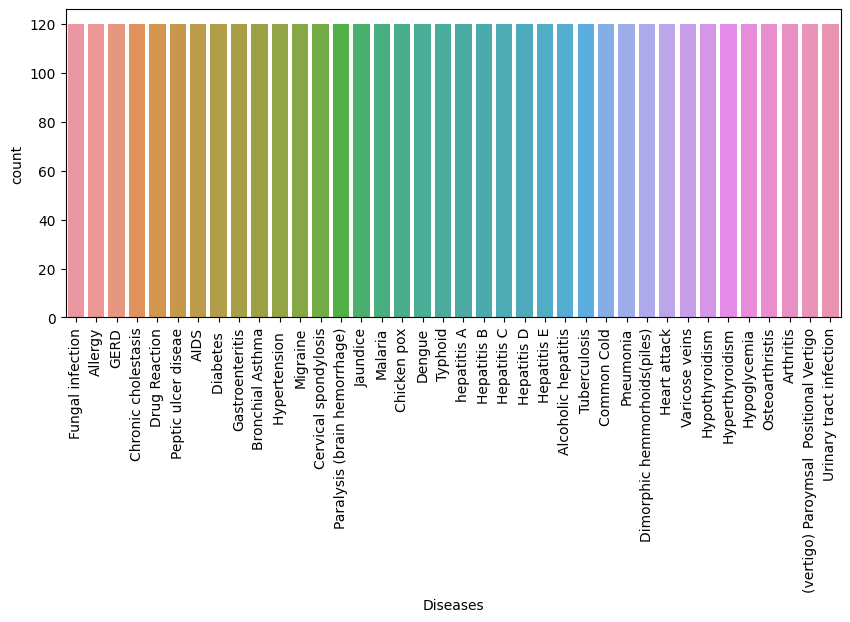

In [90]:
#countplot
plt.figure(figsize=(10,4))
sns.countplot(data=df,x='prognosis')
plt.xticks(rotation=90)
plt.xlabel('Diseases');

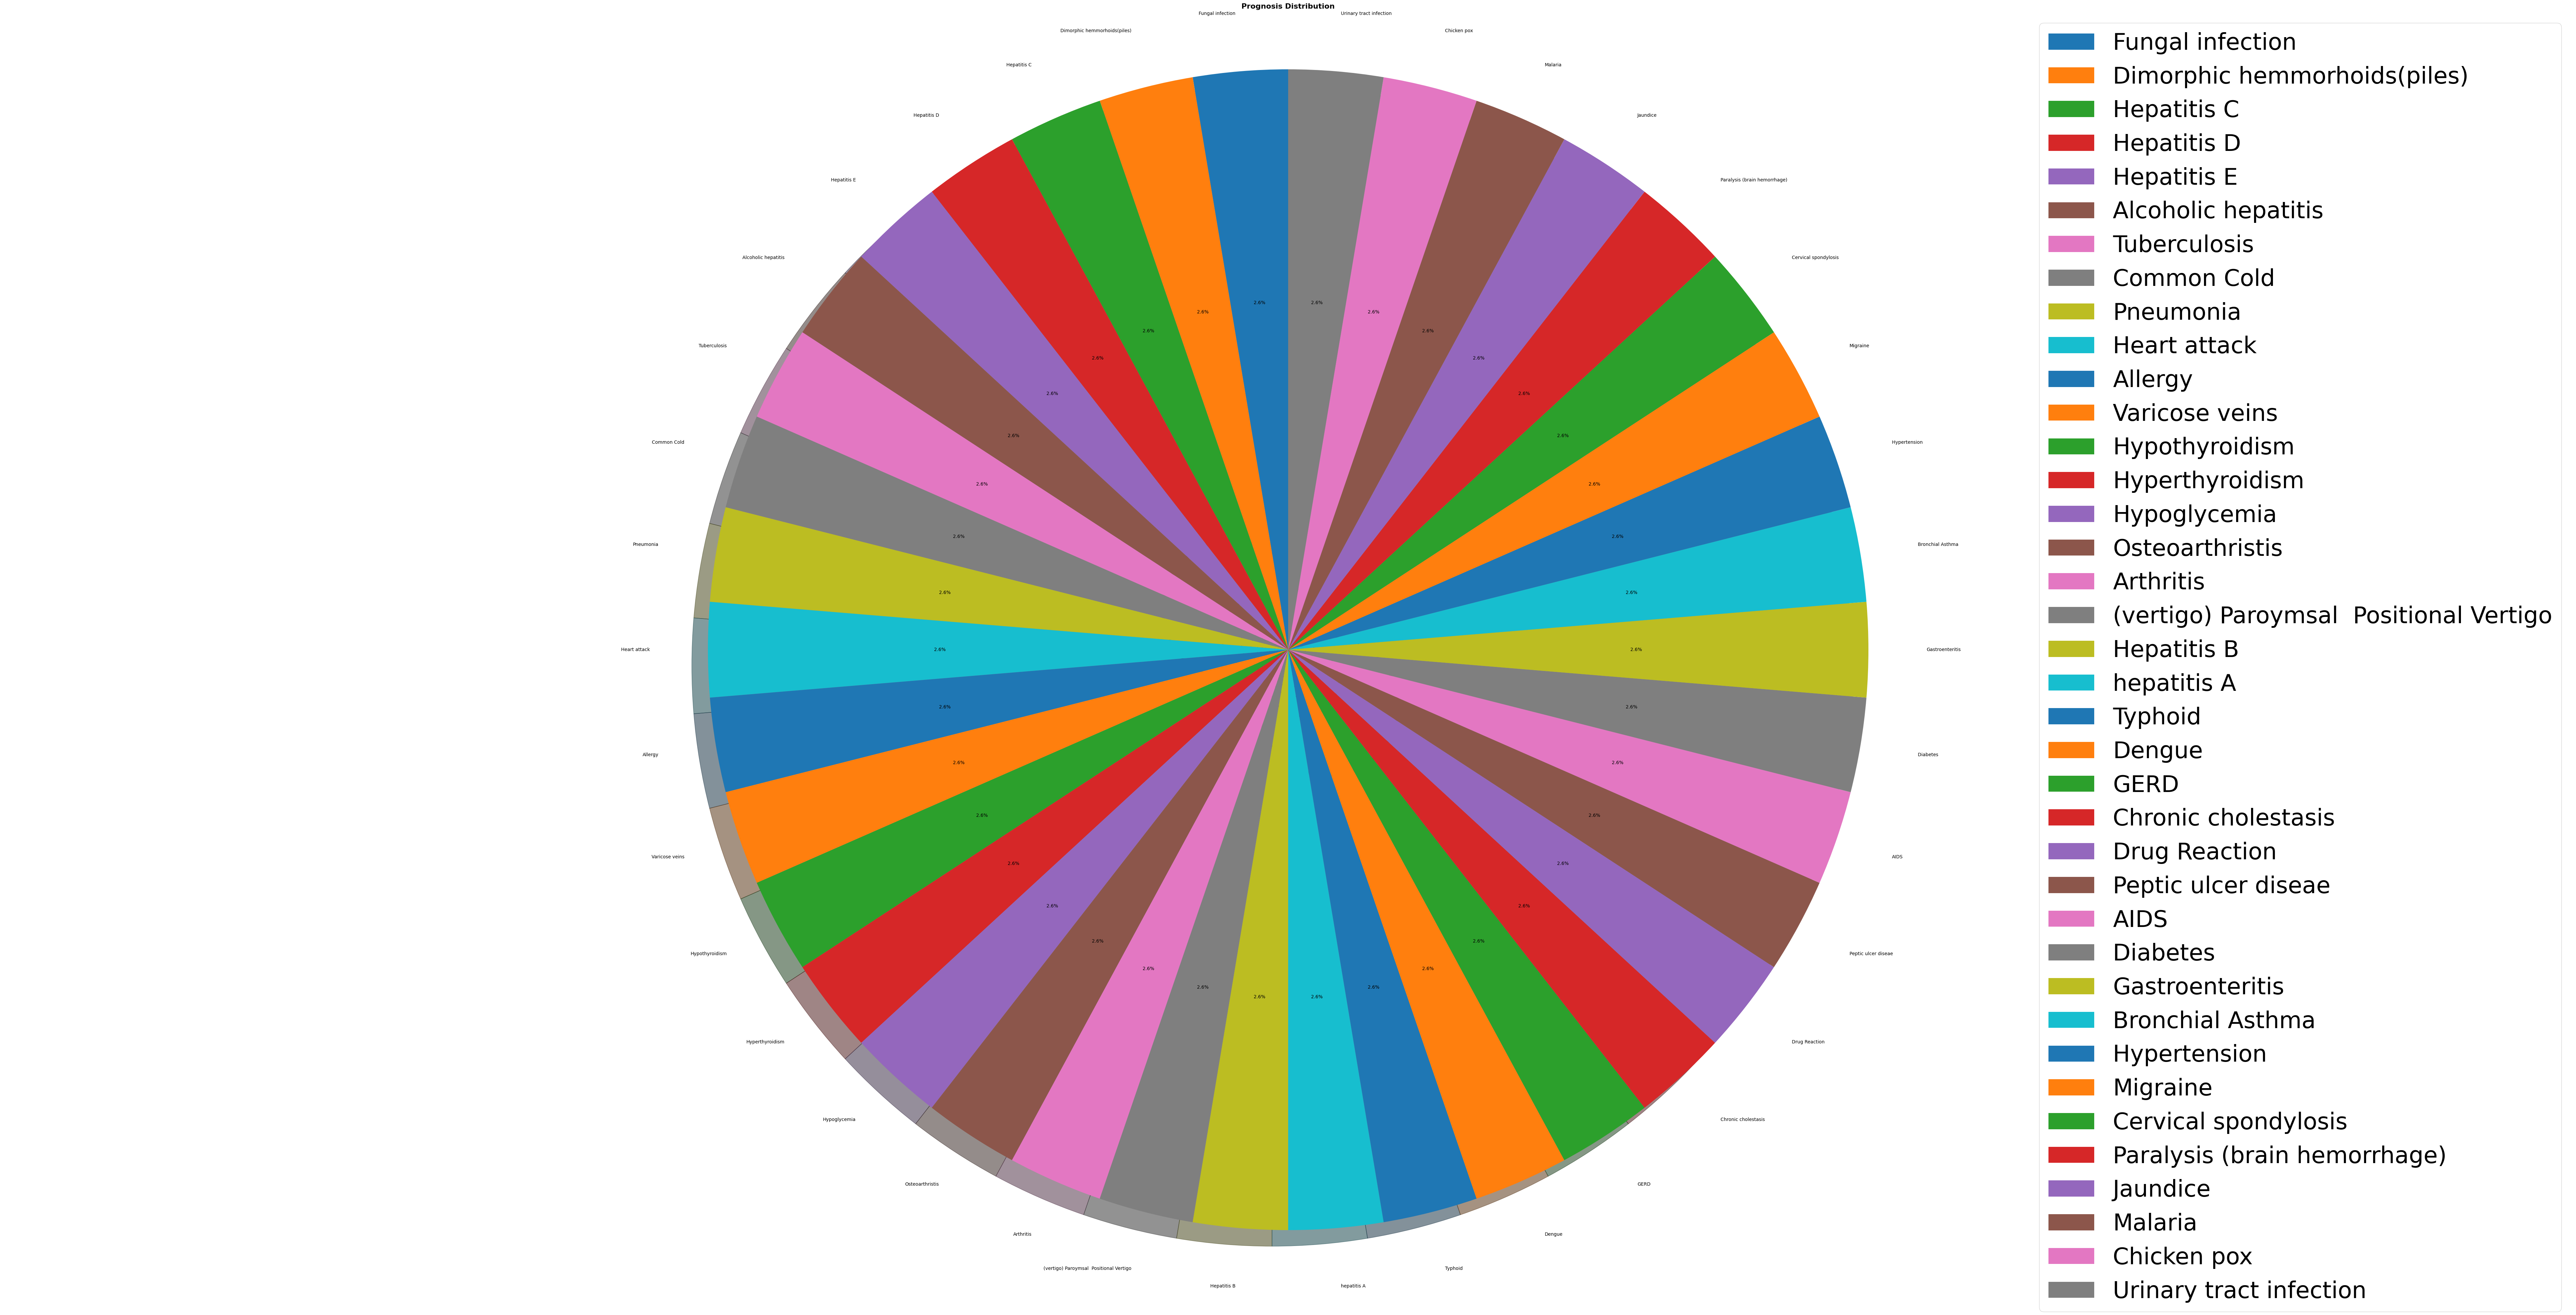

In [91]:
plt.figure(figsize=(100, 50))

category_counts = df['prognosis'].value_counts()


plt.pie(category_counts, labels=category_counts.index,  autopct='%1.1f%%', shadow=True, startangle=90)

plt.title('Prognosis Distribution', fontsize=16, fontweight='bold')
plt.legend(category_counts.index, loc='best', fontsize=50)
plt.axis('equal')

plt.show()

In [276]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a DataFrame named 'df'

# Get the number of columns (excluding 'prognosis')
num_columns = len(df.columns) - 1

# Calculate the number of rows and columns for the subplots grid
num_rows = int(np.ceil(num_columns / 2))  # Adjust the number of rows as needed
num_cols = min(3, num_columns)  # Set the number of columns per row

# Calculate the figure size based on the number of rows and columns
fig_width = 16
fig_height = 6 * (num_rows+2)

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

# Flatten the axes array
axes = axes.flatten()

# Iterate over the columns (excluding 'prognosis') and create the bar plots
for i, column in enumerate(df.columns):
    if column != 'prognosis':
        cross_tab = pd.crosstab(df['prognosis'], df[column])
        ax = axes[i]

        cross_tab.plot(kind='bar', stacked=True, ax=ax)
        ax.set_title(f"Cross-Tabulation between 'prognosis' and '{column}'")
        ax.set_xlabel('Prognosis')
        ax.set_ylabel('Count')

# Hide the extra subplots if there are more axes than columns
if len(axes) > num_columns:
    for ax in axes[num_columns:]:
        ax.axis('off')

# Adjust the spacing between subplots
plt.tight_layout(pad=1.5)

# Display the plot
plt.show()


In [92]:
num = ['itching','skin_rash','continuous_sneezing','joint_pain','stomach_pain','acidity','ulcers_on_tongue','burning_micturition',
       'spotting_ urination','weight_gain','anxiety','cold_hands_and_feets','mood_swings','weight_loss','restlessness','irregular_sugar_level','cough','high_fever',
       'sunken_eyes','breathlessness','sweating','dehydration','indigestion','headache','yellowish_skin','dark_urine','loss_of_appetite','pain_behind_the_eyes',
       'back_pain','constipation','abdominal_pain','diarrhoea','mild_fever','yellow_urine','yellowing_of_eyes','acute_liver_failure',
       'swelling_of_stomach','swelled_lymph_nodes','malaise','blurred_and_distorted_vision','phlegm','throat_irritation','redness_of_eyes','congestion',
       'chest_pain','weakness_in_limbs','fast_heart_rate','pain_during_bowel_movements','bloody_stool','neck_pain','dizziness','cramps','bruising','obesity',
       'swollen_legs','swollen_blood_vessels','puffy_face_and_eyes','enlarged_thyroid','brittle_nails','swollen_extremeties','excessive_hunger',
       'drying_and_tingling_lips','slurred_speech','knee_pain','hip_joint_pain','muscle_weakness',
       'stiff_neck','movement_stiffness','spinning_movements','weakness_of_one_body_side','loss_of_smell','bladder_discomfort',
       'foul_smell_of urine','continuous_feel_of_urine','passage_of_gases','internal_itching','toxic_look_(typhos)','depression','irritability',
       'muscle_pain','altered_sensorium',
       'red_spots_over_body','belly_pain','abnormal_menstruation','dischromic_patches','watering_from_eyes','increased_appetite',
       'polyuria','family_history','mucoid_sputum','rusty_sputum','lack_of_concentration','visual_disturbances','coma',
       'stomach_bleeding','blood_in_sputum','prominent_veins_on_calf','palpitations','painful_walking','shivering_or_chills',
       'unprotected_blood/sex_transfusion','pain/irritation_in_anal_region','swollen_painful_joints']

In [93]:
to_remove = ['joint_pain', 'spinning_movements', 'dizziness','swollen_legs']
num = [item for item in num if item not in to_remove]

In [94]:
#correlation
df[num].corr()

itching  skin_rash  continuous_sneezing  \
itching                            1.000000   0.514071            -0.094541   
skin_rash                          0.514071   1.000000            -0.075407   
continuous_sneezing               -0.094541  -0.075407             1.000000   
stomach_pain                       0.197606   0.250677            -0.051176   
acidity                           -0.094541  -0.075407            -0.051176   
ulcers_on_tongue                  -0.065091  -0.051917            -0.035234   
burning_micturition                0.202782   0.256024            -0.050444   
spotting_ urination                0.348368   0.409571            -0.035234   
weight_gain                       -0.066920  -0.053376            -0.036224   
anxiety                           -0.066920  -0.053376            -0.036224   
cold_hands_and_feets              -0.066920  -0.053376            -0.036224   
mood_swings                       -0.095876  -0.076472            -0.051899   
weight_loss                        0.082597  -0.111111            -0.075407   
restlessness                      -0.095876  -0.076472            -0.051899   
irregular_sugar_level             -0.066920  -0.053376            -0.036224   
cough                             -0.157005  -0.125229             0.249295   
high_fever                         0.039502   0.147122             0.106323   
sunken_eyes                       -0.065091  -0.051917            -0.035234   
breathlessness                    -0.138284  -0.110297            -0.074854   
sweating                          -0.174652  -0.139305            -0.094541   
dehydration                       -0.065091  -0.051917            -0.035234   
indigestion                       -0.094541  -0.075407            -0.051176   
headache                          -0.086427   0.183657             0.124455   
yellowish_skin                     0.290321  -0.166667            -0.113110   
dark_urine                         0.244623  -0.125988            -0.085503   
loss_of_appetite                   0.216636   0.179669            -0.131525   
pain_behind_the_eyes              -0.068705   0.465797            -0.037190   
back_pain                         -0.095876   0.305888            -0.051899   
constipation                      -0.095876  -0.076472            -0.051899   
abdominal_pain                     0.251241  -0.180283            -0.122351   
diarrhoea                         -0.157005  -0.125229            -0.084988   
mild_fever                         0.127534   0.198326            -0.065629   
yellow_urine                       0.359472  -0.053376            -0.036224   
yellowing_of_eyes                  0.161892  -0.155617            -0.105611   
acute_liver_failure               -0.066920  -0.053376            -0.036224   
swelling_of_stomach               -0.066920  -0.053376            -0.036224   
swelled_lymph_nodes                0.130609   0.201538             0.349484   
malaise                            0.211142   0.307469             0.208444   
blurred_and_distorted_vision      -0.119000  -0.094916            -0.064416   
phlegm                            -0.121242  -0.096704             0.368493   
throat_irritation                 -0.068705  -0.054800             0.688525   
redness_of_eyes                   -0.068705  -0.054800             0.688525   
congestion                        -0.068705  -0.054800             0.688525   
chest_pain                        -0.177367  -0.141470             0.227007   
weakness_in_limbs                 -0.065091  -0.051917            -0.035234   
fast_heart_rate                   -0.097197  -0.077525            -0.052613   
pain_during_bowel_movements       -0.066920  -0.053376            -0.036224   
bloody_stool                      -0.066920  -0.053376            -0.036224   
neck_pain                         -0.095876  -0.076472            -0.051899   
cramps                            -0.066920  -0.053376            -0.036224   
bruisin

<Axes: >

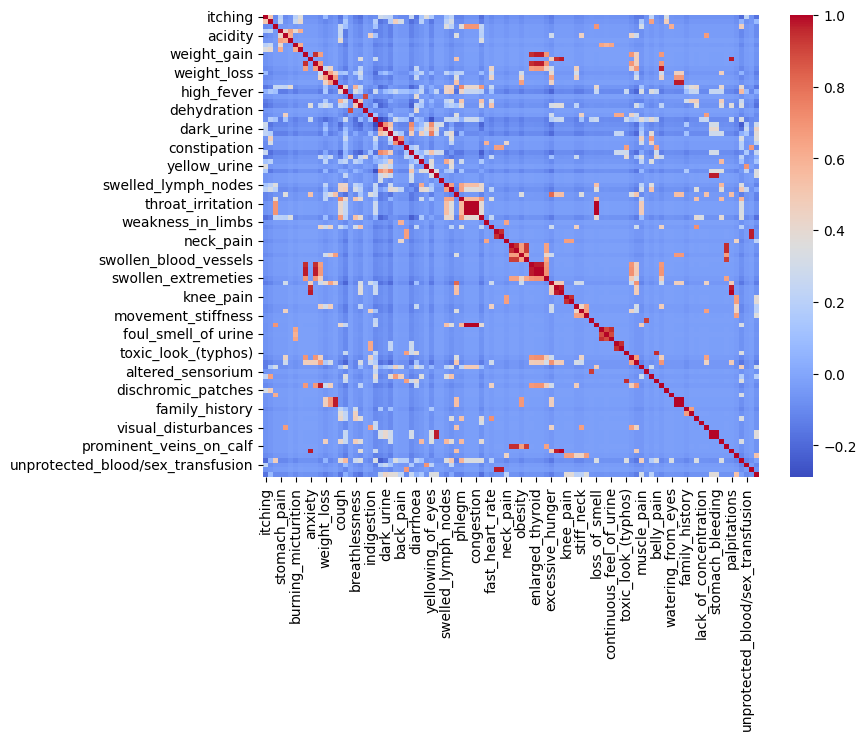

In [95]:
#heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data=df[num].corr(),cmap='coolwarm')

## Modelling

### Feature Selection

In [96]:
X = df.drop('prognosis',axis=1)
y = df['prognosis']

In [97]:
X.head()

itching  skin_rash  continuous_sneezing  stomach_pain  acidity  \
0        1          1                    0             0        0   
1        0          1                    0             0        0   
2        1          1                    0             0        0   
3        1          1                    0             0        0   
4        1          1                    0             0        0   

   ulcers_on_tongue  muscle_wasting  vomiting  burning_micturition  \
0                 0               0         0                    0   
1                 0               0         0                    0   
2                 0               0         0                    0   
3                 0               0         0                    0   
4                 0               0         0                    0   

   spotting_ urination  fatigue  weight_gain  anxiety  cold_hands_and_feets  \
0                    0        0            0        0                     0   
1                    0        0            0        0                     0   
2                    0        0            0        0                     0   
3                    0        0            0        0                     0   
4                    0        0            0        0                     0   

   mood_swings  weight_loss  restlessness  irregular_sugar_level  cough  \
0            0            0             0                      0      0   
1            0            0             0                      0      0   
2            0            0             0                      0      0   
3            0            0             0                      0      0   
4            0            0             0                      0      0   

   high_fever  sunken_eyes  breathlessness  sweating  dehydration  \
0           0            0               0         0            0   
1           0            0               0         0            0   
2           0            0               0         0            0   
3           0            0               0         0            0   
4           0            0               0         0            0   

   indigestion  headache  yellowish_skin  dark_urine  loss_of_appetite  \
0            0         0               0           0                 0   
1            0         0               0           0                 0   
2            0         0               0           0                 0   
3            0         0               0           0                 0   
4            0         0               0           0                 0   

   pain_behind_the_eyes  back_pain  constipation  abdominal_pain  diarrhoea  \
0                     0          0             0               0          0   
1                     0          0             0               0          0   
2                     0          0             0               0          0   
3                     0          0             0               0          0   
4                     0          0             0               0          0   

   mild_fever  yellow_urine  yellowing_of_eyes  acute_liver_failure  \
0           0             0                  0                    0   
1           0             0                  0                    0   
2           0             0                  0                    0   
3           0             0                  0                    0   
4           0             0                  0                    0   

   swelling_of_stomach  swelled_lymph_nodes  malaise  \
0                    0                    0        0   
1                    0                    0        0   
2                    0                    0        0   
3                    0                    0        0   
4                    0                    0        0   

   blurred_and_distorted_vision  phlegm  throat_irritation  redness_of_eyes  \
0                             0       0                  0     

### Splitting of data into test and train

In [98]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
X_train.shape

(3648, 105)

### Cross-Validation

#### MLFLOW

In [100]:
import mlflow
import os

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [ ]:
#experiment tracking
# This the dockerized method.
# We build two docker containers, one for python/jupyter and another for mlflow.
# The url `mlflow` is resolved into another container within the same composer.
mlflow.set_tracking_uri("http://localhost:5000")
# In the dockerized way, the user who runs this code will be `root`.
# The MLflow will also log the run user_id as `root`.
# To change that, we need to set this environ["LOGNAME"] to your name.
os.environ["LOGNAME"] = "Rakshya"
# mlflow.create_experiment(name="chaky-diabetes-example")  #create if you haven't create
mlflow.set_experiment(experiment_name="medical-prediction")

2023/11/28 14:04:42 INFO mlflow.tracking.fluent: Experiment with name 'medical-prediction' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/132441653081829952', creation_time=1701180282591, experiment_id='132441653081829952', last_update_time=1701180282591, lifecycle_stage='active', name='medical-prediction', tags={}>

In [ ]:

# Libraries for model evaluation

# models that we will be using, put them in a list
algorithms = [RandomForestClassifier(n_estimators=100,max_features=85,random_state=42), GradientBoostingClassifier(n_estimators=250), DecisionTreeClassifier(random_state = 0), LogisticRegression()]

# The names of the models
algorithm_names = ["Random Forest Classifier", "Gradient Boosting Classifier", "Decision Tree Classifier", "Logistic Regression"]

In [ ]:
def model_train_test(model, X_train, y_train, X_test, y_test):
    # Model training
    model.fit(X_train, y_train)

    # Predict
    pred = model.predict(X_test)

    # Accuracy score
    accuracy = accuracy_score(y_test, pred)
    print("Accuracy score =", accuracy)

    # Classification report
    report = classification_report(y_test, pred, target_names=[str(i) for i in range(38)], output_dict=True)  # Update target_names based on your number of classes
    print("\n Classification report")
    # print(report)

    # Log metrics in MLflow
    mlflow.log_metric("accuracy", accuracy)

    # Log precision, recall, and F1 score for each class
    for class_name, metrics in report.items():
        if class_name.isdigit():
            mlflow.log_metric(f"precision_class_{class_name}", metrics['precision'])
            mlflow.log_metric(f"recall_class_{class_name}", metrics['recall'])
            mlflow.log_metric(f"f1_score_class_{class_name}", metrics['f1-score'])

            # Print the metrics for each class
            print(f"Class {class_name} Metrics:")
            print(f"  Precision: {metrics['precision']:.4f}")
            print(f"  Recall: {metrics['recall']:.4f}")
            print(f"  F1 Score: {metrics['f1-score']:.4f}")
            print("-" * 30)

    # Save the model
    mlflow.sklearn.log_model(model, artifact_path='model')


In [ ]:
from sklearn.model_selection import cross_val_score, KFold

mlflow.start_run(run_name="Cross Validation")

# Define k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for i, model in enumerate(algorithms):
    algorithm_name = algorithm_names[i]
    print(algorithm_name)

    # Perform k-fold cross-validation
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold)

    # Log results in MLflow
    with mlflow.start_run(run_name=f"{algorithm_name}_cross_validation", nested=True):
        mlflow.set_tag("algorithm", algorithm_name)

        # Log cross-validated accuracy metrics
        mlflow.log_metric("cross_val_accuracy_mean", cv_results.mean())
        mlflow.log_metric("cross_val_accuracy_std", cv_results.std())

        # Log detailed results for each fold
        mlflow.log_param("cross_val_accuracy_per_fold", cv_results.tolist())

        # Print and display the cross-validated accuracy metrics
        print(f'Cross-validated accuracy mean for {algorithm_name}: {cv_results.mean()}')
        print(f'Cross-validated accuracy std for {algorithm_name}: {cv_results.std()}')
        
        # Perform model training and testing
        model_train_test(model, X_train, y_train, X_test, y_test)

# End the MLflow run
mlflow.end_run()

Random Forest Classifier
Cross-validated accuracy mean for Random Forest Classifier: 1.0
Cross-validated accuracy std for Random Forest Classifier: 0.0
Accuracy score = 1.0

 Classification report
Class 0 Metrics:
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000
------------------------------
Class 1 Metrics:
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000
------------------------------
Class 2 Metrics:
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000
------------------------------
Class 3 Metrics:
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000
------------------------------
Class 4 Metrics:
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000
------------------------------
Class 5 Metrics:
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000
------------------------------
Class 6 Metrics:
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000
------------------------------
Class 7 Metrics:
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000
--

## Grid Search

In [ ]:
# Define classifiers and their respective parameter grids
classifiers = {
    'RandomForest': (RandomForestClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}),
    'LogisticRegression': (LogisticRegression(), {'C': [0.1, 1.0, 10.0], 'penalty': ['l1', 'l2']})
}

In [ ]:
mlflow.end_run()

In [ ]:
from sklearn.model_selection import GridSearchCV
# Start MLflow run
mlflow.start_run(run_name="Grid Search")

# Define k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for name, (classifier, param_grid) in classifiers.items():
    print(f"Grid Search for {name}")

    # Perform grid search
    grid_search = GridSearchCV(classifier, param_grid, cv=kfold, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Log results in MLflow
    with mlflow.start_run(run_name=f"{name}_grid_search", nested=True):
        mlflow.set_tag("algorithm", name)

        # Log best parameters
        mlflow.log_params(grid_search.best_params_)

        # Log best cross-validated accuracy
        mlflow.log_metric("best_cross_val_accuracy", grid_search.best_score_)

        # Save the best classifier in the dictionary
        best_classifier = grid_search.best_estimator_

        # Print the best parameters and the corresponding score
        print(f'Best parameters for {name}: {grid_search.best_params_}')
        print(f'Best cross-validated accuracy for {name}: {grid_search.best_score_}')

        # Perform model training and testing
        model_train_test(best_classifier, X_train, y_train, X_test, y_test)

# End the MLflow run
mlflow.end_run()

Grid Search for RandomForest


Best parameters for RandomForest: {'max_depth': None, 'n_estimators': 50}
Best cross-validated accuracy for RandomForest: 1.0
Accuracy score = 1.0

 Classification report
Class 0 Metrics:
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000
------------------------------
Class 1 Metrics:
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000
------------------------------
Class 2 Metrics:
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000
------------------------------
Class 3 Metrics:
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000
------------------------------
Class 4 Metrics:
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000
------------------------------
Class 5 Metrics:
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000
------------------------------
Class 6 Metrics:
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000
------------------------------
Class 7 Metrics:
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000
----------------------------

## Testing

### Working with test-data

In [ ]:
df_test.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          0                     0                    1          1   
2        0          0                     0                    0          0   
3        1          0                     0                    0          0   
4        1          1                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0       0           0             0        0                 0   
1       1           0             0        0                 0   
2       0           0             1        1                 1   
3       0           0             0        0                 0   
4       0           0             1        0                 0   

   muscle_wasting  vomiting  burning_micturition  spotting_ urination  \
0               0         0                    0                    0   
1               0         0                    0                    0   
2               0         1                    0                    0   
3               0         1                    0                    0   
4               0         0                    1                    1   

   fatigue  weight_gain  anxiety  cold_hands_and_feets  mood_swings  \
0        0            0        0                     0            0   
1        0            0        0                     0            0   
2        0            0        0                     0            0   
3        0            0        0                     0            0   
4        0            0        0                     0            0   

   weight_loss  restlessness  lethargy  patches_in_throat  \
0            0             0         0                  0   
1            0             0         0                  0   
2            0             0         0                  0   
3            0             0         0                  0   
4            0             0         0                  0   

   irregular_sugar_level  cough  high_fever  sunken_eyes  breathlessness  \
0                      0      0           0            0               0   
1                      0      0           0            0               0   
2                      0      1           0            0               0   
3                      0      0           0            0               0   
4                      0      0           0            0               0   

   sweating  dehydration  indigestion  headache  yellowish_skin  dark_urine  \
0         0            0            0         0               0           0   
1         0            0            0         0               0           0   
2         0            0            0         0               0           0   
3         0            0            0         0               1           0   
4         0            0            0         0               0           0   

   nausea  loss_of_appetite  pain_behind_the_eyes  back_pain  constipation  \
0       0                 0                     0          0             0   
1       0                 0                     0          0             0   
2       0                 0                     0          0             0   
3       1                 1                     0          0             0   
4       0                 0                     0          0             0   

   abdominal_pain  diarrhoea  mild_fever  yellow_urine  yellowing_of_eyes  \
0               0          0           0             0                  0   
1               0          0           0             0                  0   
2               0          0           0             0                  0   
3               1          0           0             0                  1   
4               0          0           0             0                  0   

   acute_liver_failure  fluid_over

In [ ]:
df_test.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          0                     0                    1          1   
2        0          0                     0                    0          0   
3        1          0                     0                    0          0   
4        1          1                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0       0           0             0        0                 0   
1       1           0             0        0                 0   
2       0           0             1        1                 1   
3       0           0             0        0                 0   
4       0           0             1        0                 0   

   muscle_wasting  vomiting  burning_micturition  spotting_ urination  \
0               0         0                    0                    0   
1               0         0                    0                    0   
2               0         1                    0                    0   
3               0         1                    0                    0   
4               0         0                    1                    1   

   fatigue  weight_gain  anxiety  cold_hands_and_feets  mood_swings  \
0        0            0        0                     0            0   
1        0            0        0                     0            0   
2        0            0        0                     0            0   
3        0            0        0                     0            0   
4        0            0        0                     0            0   

   weight_loss  restlessness  lethargy  patches_in_throat  \
0            0             0         0                  0   
1            0             0         0                  0   
2            0             0         0                  0   
3            0             0         0                  0   
4            0             0         0                  0   

   irregular_sugar_level  cough  high_fever  sunken_eyes  breathlessness  \
0                      0      0           0            0               0   
1                      0      0           0            0               0   
2                      0      1           0            0               0   
3                      0      0           0            0               0   
4                      0      0           0            0               0   

   sweating  dehydration  indigestion  headache  yellowish_skin  dark_urine  \
0         0            0            0         0               0           0   
1         0            0            0         0               0           0   
2         0            0            0         0               0           0   
3         0            0            0         0               1           0   
4         0            0            0         0               0           0   

   nausea  loss_of_appetite  pain_behind_the_eyes  back_pain  constipation  \
0       0                 0                     0          0             0   
1       0                 0                     0          0             0   
2       0                 0                     0          0             0   
3       1                 1                     0          0             0   
4       0                 0                     0          0             0   

   abdominal_pain  diarrhoea  mild_fever  yellow_urine  yellowing_of_eyes  \
0               0          0           0             0                  0   
1               0          0           0             0                  0   
2               0          0           0             0                  0   
3               1          0           0             0                  1   
4               0          0           0             0                  0   

   acute_liver_failure  fluid_over

In [ ]:
#testing dataset percentage 
print("Testing Dataset percentage = ",100 * len(df_test)/(len(df)+len(df_test)))

Testing Dataset percentage =  0.9126466753585397


In [ ]:
df_test.describe()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  42.000000  42.000000             42.000000            42.000000   
mean    0.166667   0.190476              0.023810             0.047619   
std     0.377195   0.397437              0.154303             0.215540   
min     0.000000   0.000000              0.000000             0.000000   
25%     0.000000   0.000000              0.000000             0.000000   
50%     0.000000   0.000000              0.000000             0.000000   
75%     0.000000   0.000000              0.000000             0.000000   
max     1.000000   1.000000              1.000000             1.000000   

       shivering     chills  joint_pain  stomach_pain    acidity  \
count  42.000000  42.000000   42.000000     42.000000  42.000000   
mean    0.023810   0.166667    0.142857      0.047619   0.047619   
std     0.154303   0.377195    0.354169      0.215540   0.215540   
min     0.000000   0.000000    0.000000      0.000000   0.000000   
25%     0.000000   0.000000    0.000000      0.000000   0.000000   
50%     0.000000   0.000000    0.000000      0.000000   0.000000   
75%     0.000000   0.000000    0.000000      0.000000   0.000000   
max     1.000000   1.000000    1.000000      1.000000   1.000000   

       ulcers_on_tongue  muscle_wasting   vomiting  burning_micturition  \
count         42.000000       42.000000  42.000000            42.000000   
mean           0.023810        0.023810   0.404762             0.047619   
std            0.154303        0.154303   0.496796             0.215540   
min            0.000000        0.000000   0.000000             0.000000   
25%            0.000000        0.000000   0.000000             0.000000   
50%            0.000000        0.000000   0.000000             0.000000   
75%            0.000000        0.000000   1.000000             0.000000   
max            1.000000        1.000000   1.000000             1.000000   

       spotting_ urination    fatigue  weight_gain    anxiety  \
count            42.000000  42.000000    42.000000  42.000000   
mean              0.023810   0.404762     0.023810   0.023810   
std               0.154303   0.496796     0.154303   0.154303   
min               0.000000   0.000000     0.000000   0.000000   
25%               0.000000   0.000000     0.000000   0.000000   
50%               0.000000   0.000000     0.000000   0.000000   
75%               0.000000   1.000000     0.000000   0.000000   
max               1.000000   1.000000     1.000000   1.000000   

       cold_hands_and_feets  mood_swings  weight_loss  restlessness  \
count             42.000000    42.000000    42.000000     42.000000   
mean               0.023810     0.047619     0.095238      0.047619   
std                0.154303     0.215540     0.297102      0.215540   
min                0.000000     0.000000     0.000000      0.000000   
25%                0.000000     0.000000     0.000000      0.000000   
50%                0.000000     0.000000     0.000000      0.000000   
75%                0.000000     0.000000     0.000000      0.000000   
max                1.000000     1.000000     1.000000      1.000000   

        lethargy  patches_in_throat  irregular_sugar_level      cough  \
count  42.000000          42.000000              42.000000  42.000000   
mean    0.095238           0.023810               0.023810   0.119048   
std     0.297102           0.154303               0.154303   0.327770   
min     0.000000           0.000000               0.000000   0.000000   
25%     0.000000           0.000000               0.000000   0.000000   
50%     0.000000           0.000000               0.000000   0.000000   
75%     0.000000           0.000000               0.000000   0.000000   
max     1.000000           1.000000               1.000000   1.000000   

       high_fever  sunken_eyes  breathlessness   sweating  dehydration  \
count   42.000000    42.000000       42.000000  42.000000    42.000000   
mean     0.285714    

### Preprocessing of test

In [ ]:
df_test['shivering_or_chills'] = df_test['shivering'] | df_test['chills']
df_test.drop(columns=['shivering','chills'], inplace=True)

In [ ]:
df_test['skin_rash'] = df_test['nodal_skin_eruptions'] | df_test['skin_rash']
df_test.drop(columns=['nodal_skin_eruptions'], inplace=True)

In [ ]:
df_test['unprotected_blood_transfusion'] = df_test['receiving_blood_transfusion'] | df_test['receiving_unsterile_injections']
df_test.drop(columns=['receiving_blood_transfusion','receiving_unsterile_injections'], inplace=True)

In [ ]:
df_test['patches_in_throat'] = df_test['patches_in_throat'] | df_test['muscle_wasting']
df_test.drop(columns=['patches_in_throat'], inplace=True)

In [ ]:
df_test['vomiting'] = df_test['vomiting'] | df_test['nausea']
df_test.drop(columns=['nausea'], inplace=True)

In [ ]:
df_test['runny_nose'] = df_test['runny_nose'] | df_test['sinus_pressure']
df_test.drop(columns=['sinus_pressure'], inplace=True)

In [ ]:
df_test['unsteadiness'] = df_test['unsteadiness'] | df_test['loss_of_balance']
df_test.drop(columns=['loss_of_balance'], inplace=True)

In [ ]:
df_test['distention_of_abdomen'] = df_test['distention_of_abdomen'] | df_test['history_of_alcohol_consumption']
df_test.drop(columns=['history_of_alcohol_consumption',], inplace=True)

In [ ]:
df_test['unprotected_blood/sex_transfusion'] = df_test['unprotected_blood_transfusion'] | df_test['extra_marital_contacts']
df_test.drop(columns=['extra_marital_contacts','unprotected_blood_transfusion'], inplace=True)

In [ ]:
df_test['pain/irritation_in_anal_region'] = df_test['pain_in_anal_region'] | df_test['irritation_in_anus']
df_test.drop(columns=['irritation_in_anus','pain_in_anal_region'], inplace=True)

In [ ]:
df_test['fatigue'] = df_test['fatigue'] | df_test['lethargy']
df_test.drop(columns=['lethargy'], inplace=True)

In [ ]:
df_test['unsteadiness'] = df_test['unsteadiness'] | df_test['spinning_movements']
df_test.drop(columns=['spinning_movements'], inplace=True)

In [ ]:
df_test.rename(columns={'dischromic _patches': 'dischromic_patches'}, inplace=True)

In [ ]:
df_test.drop(columns=['fluid_overload','fluid_overload.1'],inplace=True)

In [ ]:
label_mapping = {
    'Acne': 'Skin Disorders',
    'Psoriasis': 'Skin Disorders',
    'Impetigo': 'Skin Disorders'
}

df_test['prognosis'] = df_test['prognosis'].replace(label_mapping)

In [ ]:
columns_to_drop = ['pus_filled_pimples', 'blackheads', 'scurring', 'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails', 'blister', 'red_sore_around_nose', 'skin_peeling','yellow_crust_ooze']
df_test.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df_test = df_test[df_test['prognosis'] != 'Skin Disorders']

In [ ]:
df_test['swollen_painful_joints'] = df_test['swelling_joints'] | df_test['joint_pain']
df_test.drop(columns=['joint_pain','swelling_joints'], inplace=True)

In [ ]:
df_test['unsteadiness'] = df_test['unsteadiness'] | df_test['dizziness']
df_test.drop(columns=['dizziness'], inplace=True)

In [ ]:
df_test['swollen_extremeties'] = df_test['swollen_extremeties'] | df_test['swollen_legs']
df_test.drop(columns=['swollen_legs'], inplace=True)

In [ ]:
df.head()

itching  skin_rash  continuous_sneezing  stomach_pain  acidity  \
0        1          1                    0             0        0   
1        0          1                    0             0        0   
2        1          1                    0             0        0   
3        1          1                    0             0        0   
4        1          1                    0             0        0   

   ulcers_on_tongue  muscle_wasting  vomiting  burning_micturition  \
0                 0               0         0                    0   
1                 0               0         0                    0   
2                 0               0         0                    0   
3                 0               0         0                    0   
4                 0               0         0                    0   

   spotting_ urination  fatigue  weight_gain  anxiety  cold_hands_and_feets  \
0                    0        0            0        0                     0   
1                    0        0            0        0                     0   
2                    0        0            0        0                     0   
3                    0        0            0        0                     0   
4                    0        0            0        0                     0   

   mood_swings  weight_loss  restlessness  irregular_sugar_level  cough  \
0            0            0             0                      0      0   
1            0            0             0                      0      0   
2            0            0             0                      0      0   
3            0            0             0                      0      0   
4            0            0             0                      0      0   

   high_fever  sunken_eyes  breathlessness  sweating  dehydration  \
0           0            0               0         0            0   
1           0            0               0         0            0   
2           0            0               0         0            0   
3           0            0               0         0            0   
4           0            0               0         0            0   

   indigestion  headache  yellowish_skin  dark_urine  loss_of_appetite  \
0            0         0               0           0                 0   
1            0         0               0           0                 0   
2            0         0               0           0                 0   
3            0         0               0           0                 0   
4            0         0               0           0                 0   

   pain_behind_the_eyes  back_pain  constipation  abdominal_pain  diarrhoea  \
0                     0          0             0               0          0   
1                     0          0             0               0          0   
2                     0          0             0               0          0   
3                     0          0             0               0          0   
4                     0          0             0               0          0   

   mild_fever  yellow_urine  yellowing_of_eyes  acute_liver_failure  \
0           0             0                  0                    0   
1           0             0                  0                    0   
2           0             0                  0                    0   
3           0             0                  0                    0   
4           0             0                  0                    0   

   swelling_of_stomach  swelled_lymph_nodes  malaise  \
0                    0                    0        0   
1                    0                    0        0   
2                    0                    0        0   
3                    0                    0        0   
4                    0                    0        0   

   blurred_and_distorted_vision  phlegm  throat_irritation  redness_of_eyes  \
0                             0       0                  0     

In [ ]:
df_test.head()

itching  skin_rash  continuous_sneezing  stomach_pain  acidity  \
0        1          1                    0             0        0   
1        0          0                    1             0        0   
2        0          0                    0             1        1   
3        1          0                    0             0        0   
4        1          1                    0             1        0   

   ulcers_on_tongue  muscle_wasting  vomiting  burning_micturition  \
0                 0               0         0                    0   
1                 0               0         0                    0   
2                 1               0         1                    0   
3                 0               0         1                    0   
4                 0               0         0                    1   

   spotting_ urination  fatigue  weight_gain  anxiety  cold_hands_and_feets  \
0                    0        0            0        0                     0   
1                    0        0            0        0                     0   
2                    0        0            0        0                     0   
3                    0        0            0        0                     0   
4                    1        0            0        0                     0   

   mood_swings  weight_loss  restlessness  irregular_sugar_level  cough  \
0            0            0             0                      0      0   
1            0            0             0                      0      0   
2            0            0             0                      0      1   
3            0            0             0                      0      0   
4            0            0             0                      0      0   

   high_fever  sunken_eyes  breathlessness  sweating  dehydration  \
0           0            0               0         0            0   
1           0            0               0         0            0   
2           0            0               0         0            0   
3           0            0               0         0            0   
4           0            0               0         0            0   

   indigestion  headache  yellowish_skin  dark_urine  loss_of_appetite  \
0            0         0               0           0                 0   
1            0         0               0           0                 0   
2            0         0               0           0                 0   
3            0         0               1           0                 1   
4            0         0               0           0                 0   

   pain_behind_the_eyes  back_pain  constipation  abdominal_pain  diarrhoea  \
0                     0          0             0               0          0   
1                     0          0             0               0          0   
2                     0          0             0               0          0   
3                     0          0             0               1          0   
4                     0          0             0               0          0   

   mild_fever  yellow_urine  yellowing_of_eyes  acute_liver_failure  \
0           0             0                  0                    0   
1           0             0                  0                    0   
2           0             0                  0                    0   
3           0             0                  1                    0   
4           0             0                  0                    0   

   swelling_of_stomach  swelled_lymph_nodes  malaise  \
0                    0                    0        0   
1                    0                    0        0   
2                    0                    0        0   
3                    0                    0        0   
4                    0                    0        0   

   blurred_and_distorted_vision  phlegm  throat_irritation  redness_of_eyes  \
0                             0       0                  0     

In [ ]:
df_test.columns[df.isnull().any()]

Index([], dtype='object')

In [ ]:
df_test.columns

Index(['itching', 'skin_rash', 'continuous_sneezing', 'stomach_pain',
       'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting',
       'burning_micturition', 'spotting_ urination',
       ...
       'distention_of_abdomen', 'blood_in_sputum', 'prominent_veins_on_calf',
       'palpitations', 'painful_walking', 'prognosis', 'shivering_or_chills',
       'unprotected_blood/sex_transfusion', 'pain/irritation_in_anal_region',
       'swollen_painful_joints'],
      dtype='object', length=106)

### Feature Selection

In [ ]:
X = df_test.drop('prognosis',axis=1)
y = df_test['prognosis']

### Cross-validation

In [ ]:
algorithms = [RandomForestClassifier(n_estimators=100,max_features=85,random_state=42), LogisticRegression()]

# The names of the models
algorithm_names = ["Random Forest Classifier", "Logistic Regression"]

In [ ]:
mlflow.end_run()

NameError: name 'mlflow' is not defined

In [ ]:
def test_accuracy(model, X, y, algorithm_name):
    # Predict
    pred = model.predict(X)

    # Accuracy score
    accuracy = accuracy_score(y, pred)
    print("Accuracy score =", accuracy)

    # Classification report
    report = classification_report(y, pred)
    print("\n", report)

    # Log results in MLflow
    with mlflow.start_run(run_name=f"{algorithm_name}_test"):
        mlflow.set_tag("algorithm", algorithm_name)
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_param("algorithm_name", algorithm_name)

In [ ]:
from sklearn.model_selection import KFold

#defining splits
kfold = KFold(n_splits=5, shuffle=True)

# Iterate through models and test accuracy
for i, model in enumerate(algorithms):
    algorithm_name = algorithm_names[i]
    print(algorithm_name)
    test_accuracy(model, X, y, algorithm_name)

# End the MLflow run
mlflow.end_run()

Random Forest Classifier
Accuracy score = 0.9743589743589743

                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       0.50      1.00      0.67         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
                                 Dengue      

### Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

grid = {"C": np.logspace(-3, 3, 7), "penalty": ["l1", "l2"]}  # l1 lasso l2 ridge
logreg = LogisticRegression(solver='liblinear')  # Specify the solver here
logreg_cv = GridSearchCV(logreg, grid, cv=10)
logreg_cv.fit(X_train, y_train)

print("tuned hyperparameters (best parameters):", logreg_cv.best_params_)
print("accuracy:", logreg_cv.best_score_)

tuned hyperparameters (best parameters): {'C': 0.01, 'penalty': 'l2'}
accuracy: 1.0


In [ ]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
logreg_pred = logreg_cv.predict(X_test)

# Compute accuracy
logreg_acc = accuracy_score(y_test, logreg_pred)

# Get confidence scores (probability estimates) for each class
logreg_confidence = logreg_cv.predict_proba(X_test)

print("Accuracy on test set: {:.2f}%".format(logreg_acc * 100))


Accuracy on test set: 100.00%


### Model Selection

In [ ]:
best_logreg = logreg_cv.best_estimator_
best_logreg

LogisticRegression(C=0.01, solver='liblinear')

### Feature Importance

In [ ]:
feature_importances = best_logreg.coef_[0]


In [ ]:
feature_importances

array([-0.2799265 , -0.2212956 , -0.11367181, -0.13791816, -0.13194424,
       -0.06829092, -0.08633407, -0.10715307, -0.16036814, -0.06902678,
       -0.54008795, -0.0555868 , -0.04347356, -0.05624053, -0.0822312 ,
       -0.11111671, -0.0730594 , -0.04389114, -0.16639403, -0.35876486,
       -0.09000616, -0.14148372, -0.21670439, -0.08664036, -0.12872699,
        0.15522669, -0.27301538, -0.1121188 , -0.29189937, -0.02001417,
       -0.15189375, -0.12795203, -0.32406323, -0.22243511, -0.0685627 ,
       -0.02032226, -0.1787655 , -0.01691074, -0.08008456, -0.06441747,
       -0.12589939, -0.15414636, -0.05476186, -0.0243094 , -0.0243094 ,
       -0.0243094 , -0.0243094 , -0.33810579, -0.13376759, -0.04967705,
       -0.1023071 , -0.1023071 , -0.2113378 , -0.06236944, -0.06167362,
       -0.10702533, -0.0582079 , -0.0536304 , -0.05755038, -0.05755038,
       -0.11899516, -0.18292262, -0.04486527, -0.04626069, -0.07044307,
       -0.0713377 , -0.10957064, -0.14586062, -0.08036723,  0.35

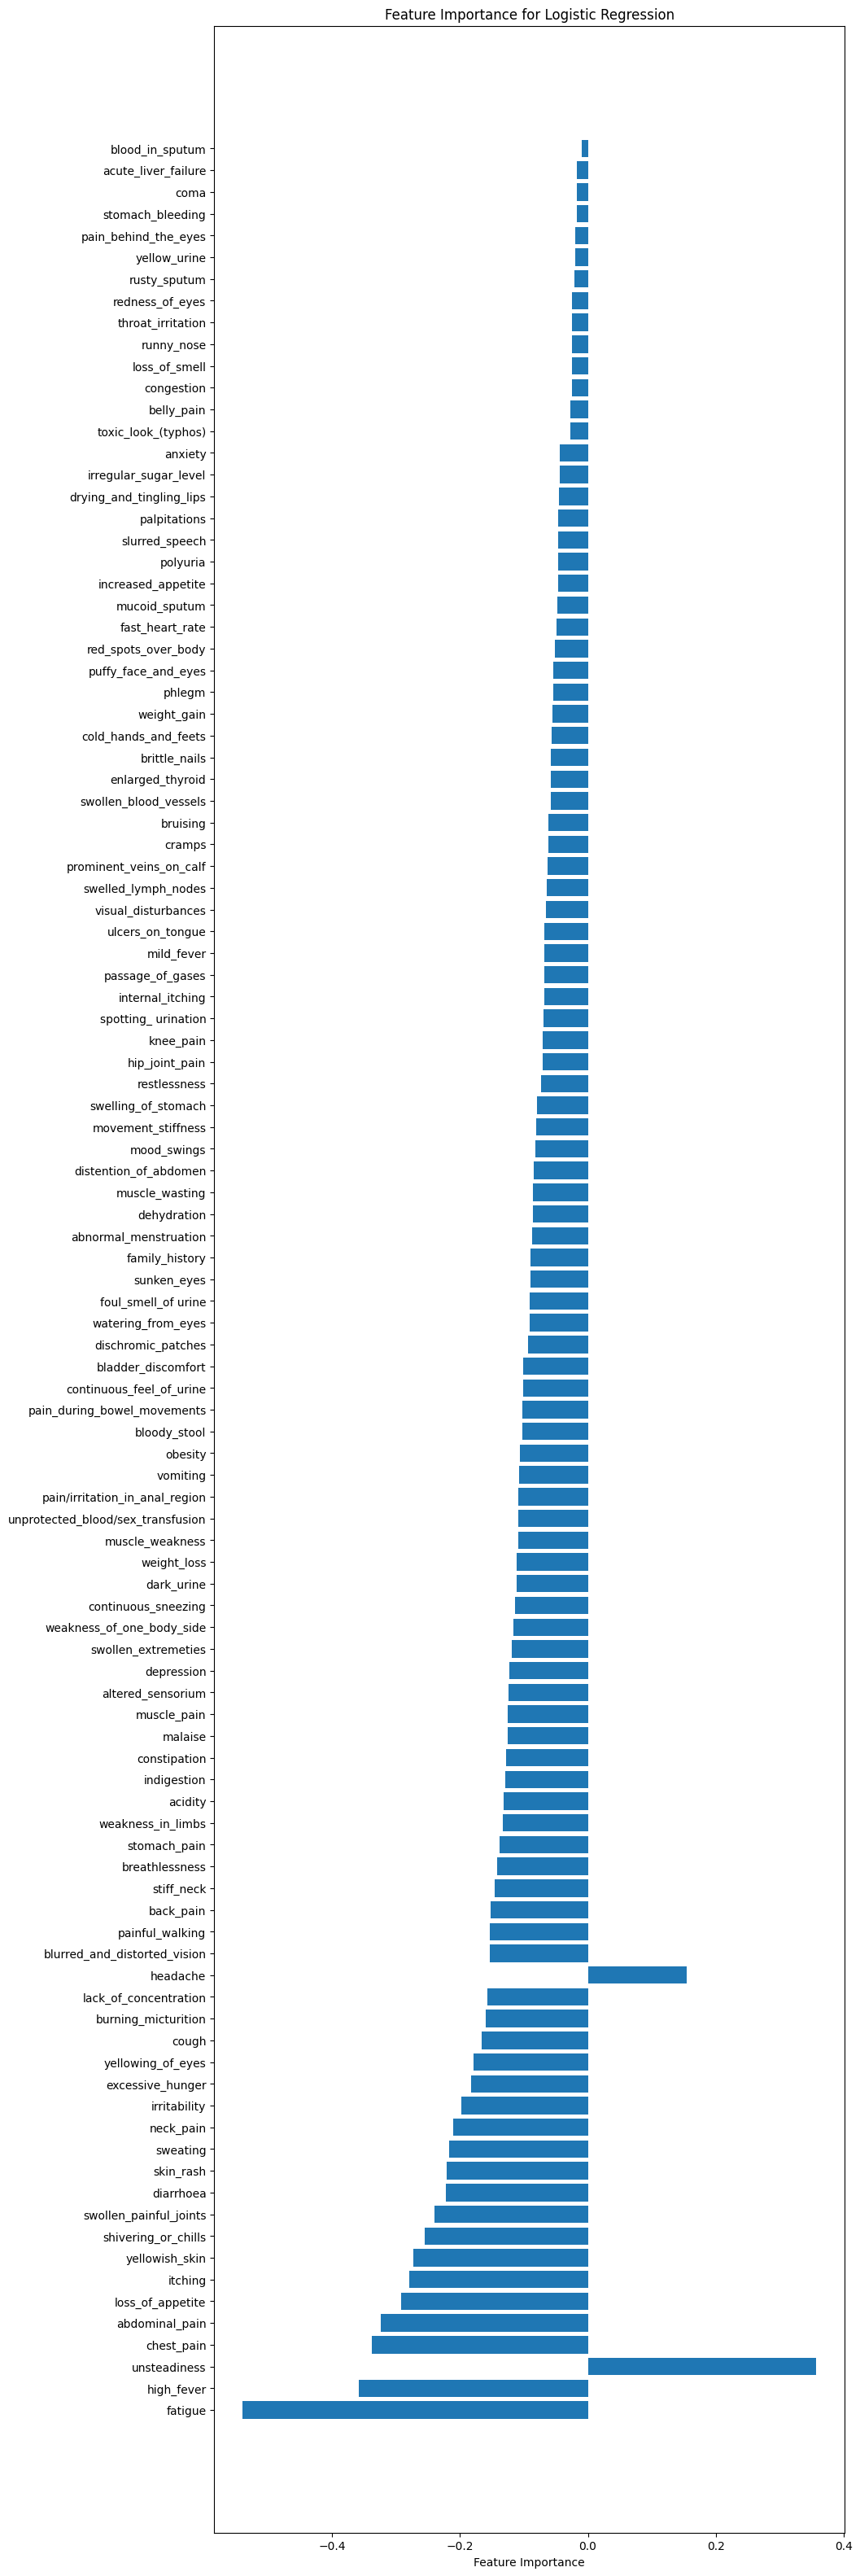

In [ ]:
import numpy as np

# Calculate the absolute values of the feature coefficients
abs_coef = np.abs(best_logreg.coef_[0])

# Get the indices that would sort the coefficients in descending order
sorted_idx = np.argsort(abs_coef)[::-1]

# Sort the feature names and coefficients based on the sorted indices
sorted_features = [X.columns[i] for i in sorted_idx]
sorted_coefs = best_logreg.coef_[0][sorted_idx]

# Set the figure size
plt.figure(figsize=(10, 40))  # Adjust the values (width, height) as needed

# Create a horizontal bar plot for the top features
plt.barh(sorted_features, sorted_coefs)

# Add labels, titles, etc. as needed
plt.xlabel("Feature Importance")
plt.title("Feature Importance for Logistic Regression")

# Show the plot
plt.show()


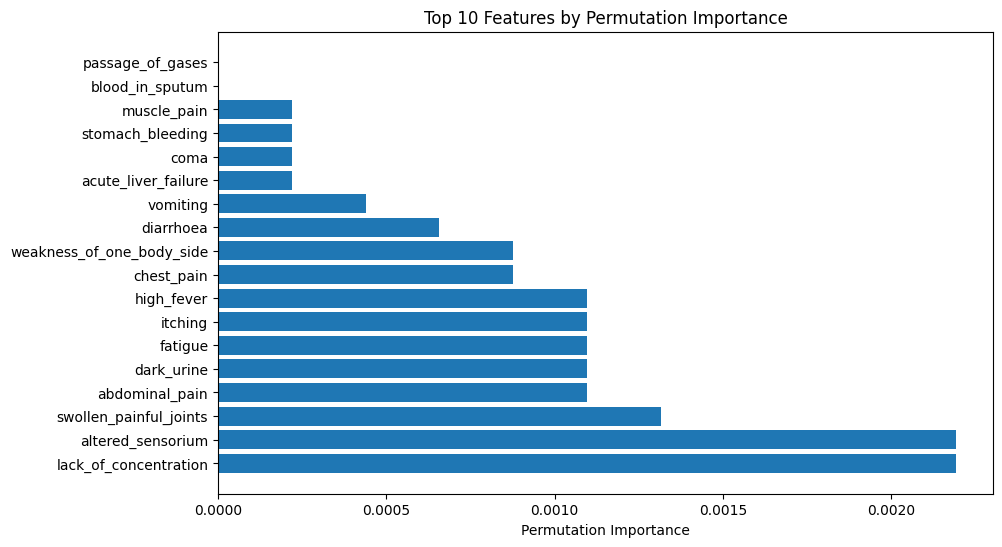

In [ ]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(best_logreg, X_test, y_test)

# Get the indices of the top 10 features with the highest permutation importance
top_10_indices = (-perm_importance.importances_mean).argsort()[:18]

# Sort the importances and feature names based on the top 10 indices
sorted_importances = perm_importance.importances_mean[top_10_indices]
sorted_feature_names = X.columns[top_10_indices]

# Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_importances)
plt.xlabel("Permutation Importance")
plt.title("Top 10 Features by Permutation Importance")
plt.show()


## Inference

In [ ]:
faker_data=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0]
# Reshape the input data to match the number of features
faker_data_reshaped = np.array(faker_data).reshape(1, -1)  # Reshape z to have the same number of features as the training data

logreg_confidence = logreg_cv.best_estimator_.predict_proba(faker_data_reshaped)
print(logreg_confidence)
logreg_pred = logreg_cv.best_estimator_.predict(faker_data_reshaped)
print(logreg_pred)
max_confidence = max(logreg_confidence[0])
print("Maximum confidence:", max_confidence)

In [ ]:
import time

# Assuming you have a test set: X_test_scaled

# Get the best estimator from the grid search results
best_model = best_logreg
# Measure inference speed
start_time = time.time()
predictions = best_model.predict(X_test)
end_time = time.time()

inference_speed = len(X_test) / (end_time - start_time)

print(f"Inference Speed: {inference_speed} samples per second")

Inference Speed: 34993.14123663242 samples per second
